### Time Series Analysis and Forecasting of Apple Stock Prices (AAPL)

#### About
This file provides a comprehensive time series analysis of Apple stock data, including data preprocessing, trend decomposition, stationarity testing, and forecasting using ARIMA modeling techniques.

- **Importing Libraries:**
  - Import essential libraries for data analysis, visualization, and time series modeling (`pandas`, `numpy`, `matplotlib`, `statsmodels`, `scikit-learn`).

- **Loading Data:**
  - Read the AAPL stock data from a CSV file into a pandas DataFrame.
  
- **Data Inspection:**
  - Display the first few rows of the DataFrame using `df.head()`.
  - Check data types and missing values with `df.info()` and `df.describe()` for basic statistical insights.

- **Handling Missing Values:**
  - Check for missing data in the DataFrame using `df.isnull().sum()`.

- **Date Conversion & Sorting:**
  - Convert the 'date' column to `datetime` format using `pd.to_datetime()`.
  - Sort the DataFrame by the 'date' column to ensure chronological order.

- **Data Range Check:**
  - Identify the date range of the dataset by finding the minimum and maximum dates.

- **Indexing by Date:**
  - Set the 'date' column as the index of the DataFrame for easier time series analysis.

- **Plotting Closing Prices:**
  - Plot the stock's closing price over time using `matplotlib`.

- **Decomposing the Time Series:**
  - Decompose the closing price data into trend, seasonal, and residual components using `statsmodels.tsa.seasonal_decompose()`.
  - Plot the original series, trend, seasonality, and residuals.

- **Stationarity Check:**
  - Perform the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.

- **Autocorrelation & Partial Autocorrelation:**
  - Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to help identify ARIMA model parameters.

- **ARIMA Model Fitting:**
  - Fit an ARIMA(1,1,1) model on the closing price data using `statsmodels`.
  - Display the summary of the fitted ARIMA model.

- **Forecasting Future Prices:**
  - Forecast the next 10 time steps using the fitted ARIMA model.
  - Plot the observed closing prices and the forecasted values, including confidence intervals.

This step-by-step analysis explores historical stock price trends, tests for stationarity, and provides a forecast for future stock prices.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Importing Data

In [2]:
df = pd.read_csv('AAPL_data.csv')
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02 00:00:00+00:00,109.33,111.44,107.350,111.39,53204626,24.372730,24.843109,23.931333,24.831962,212818504,0.0,1.0
1,2015-01-05 00:00:00+00:00,106.25,108.65,105.410,108.29,64285491,23.686112,24.221139,23.498852,24.140885,257141964,0.0,1.0
2,2015-01-06 00:00:00+00:00,106.26,107.43,104.630,106.54,65797116,23.688341,23.949167,23.324968,23.750761,263188464,0.0,1.0
3,2015-01-07 00:00:00+00:00,107.75,108.20,106.695,107.20,40105934,24.020504,24.120822,23.785315,23.897893,160423736,0.0,1.0
4,2015-01-08 00:00:00+00:00,111.89,112.15,108.700,109.23,59364547,24.943426,25.001388,24.232286,24.350438,237458188,0.0,1.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2432 non-null   object 
 1   close        2432 non-null   float64
 2   high         2432 non-null   float64
 3   low          2432 non-null   float64
 4   open         2432 non-null   float64
 5   volume       2432 non-null   int64  
 6   adjClose     2432 non-null   float64
 7   adjHigh      2432 non-null   float64
 8   adjLow       2432 non-null   float64
 9   adjOpen      2432 non-null   float64
 10  adjVolume    2432 non-null   int64  
 11  divCash      2432 non-null   float64
 12  splitFactor  2432 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 247.1+ KB
None


In [4]:
print(df.describe())

             close         high          low         open        volume  \
count  2432.000000  2432.000000  2432.000000  2432.000000  2.432000e+03   
mean    168.698993   170.322104   166.896045   168.542202  5.491510e+07   
std      59.704219    60.318594    58.842873    59.490234  3.444296e+07   
min      90.340000    91.670000    89.470000    90.000000  1.136204e+07   
25%     127.607500   128.862500   126.550000   127.770000  2.921752e+07   
50%     157.575000   159.875000   155.980000   158.060000  4.650355e+07   
75%     188.025000   189.302500   186.407500   187.887500  7.099347e+07   
max     506.090000   515.140000   500.330000   514.790000  3.326072e+08   

          adjClose      adjHigh       adjLow      adjOpen     adjVolume  \
count  2432.000000  2432.000000  2432.000000  2432.000000  2.432000e+03   
mean     89.601843    90.496567    88.623909    89.527787  1.191778e+08   
std      61.566871    62.176232    60.900074    61.511390  6.795028e+07   
min      20.717712    21

count- 1006 trading days
means- avg (for closing price is ) 182.19 dollars
std- how spread out the values are from the mean, so closing price std is about 74 dollars
low- lowest price(for closing price) is near about 106 dollars
25%- value below which 25% data falls.
50% (median)- median close price is 157 dollars
75%- value below which 75% data falls.
max- maximum values recorded for that particular feature , for close price it is 506.09 dollars


### Cleaning if there are any missing values

In [5]:
df.isnull().sum()

date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02 00:00:00+00:00,109.33,111.44,107.3500,111.390,53204626,24.372730,24.843109,23.931333,24.831962,212818504,0.0,1.0
1,2015-01-05 00:00:00+00:00,106.25,108.65,105.4100,108.290,64285491,23.686112,24.221139,23.498852,24.140885,257141964,0.0,1.0
2,2015-01-06 00:00:00+00:00,106.26,107.43,104.6300,106.540,65797116,23.688341,23.949167,23.324968,23.750761,263188464,0.0,1.0
3,2015-01-07 00:00:00+00:00,107.75,108.20,106.6950,107.200,40105934,24.020504,24.120822,23.785315,23.897893,160423736,0.0,1.0
4,2015-01-08 00:00:00+00:00,111.89,112.15,108.7000,109.230,59364547,24.943426,25.001388,24.232286,24.350438,237458188,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2024-08-26 00:00:00+00:00,227.18,227.28,223.8905,226.760,30602208,227.180000,227.280000,223.890500,226.760000,30602208,0.0,1.0
2428,2024-08-27 00:00:00+00:00,228.03,228.85,224.8900,225.995,35934559,228.030000,228.850000,224.890000,225.995000,35934559,0.0,1.0
2429,2024-08-28 00:00:00+00:00,226.49,229.86,225.6800,227.920,38052167,226.490000,229.860000,225.680000,227.920000,38052167,0.0,1.0
2430,2024-08-29 00:00:00+00:00,229.79,232.92,228.8800,230.100,51906297,229.790000,232.920000,228.880000,230.100000,51906297,0.0,1.0


In [7]:
print(df['date'].dtype)

datetime64[ns, UTC]


In [8]:
df = df.sort_values('date')

In [9]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02 00:00:00+00:00,109.33,111.44,107.3500,111.390,53204626,24.372730,24.843109,23.931333,24.831962,212818504,0.0,1.0
1,2015-01-05 00:00:00+00:00,106.25,108.65,105.4100,108.290,64285491,23.686112,24.221139,23.498852,24.140885,257141964,0.0,1.0
2,2015-01-06 00:00:00+00:00,106.26,107.43,104.6300,106.540,65797116,23.688341,23.949167,23.324968,23.750761,263188464,0.0,1.0
3,2015-01-07 00:00:00+00:00,107.75,108.20,106.6950,107.200,40105934,24.020504,24.120822,23.785315,23.897893,160423736,0.0,1.0
4,2015-01-08 00:00:00+00:00,111.89,112.15,108.7000,109.230,59364547,24.943426,25.001388,24.232286,24.350438,237458188,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2024-08-26 00:00:00+00:00,227.18,227.28,223.8905,226.760,30602208,227.180000,227.280000,223.890500,226.760000,30602208,0.0,1.0
2428,2024-08-27 00:00:00+00:00,228.03,228.85,224.8900,225.995,35934559,228.030000,228.850000,224.890000,225.995000,35934559,0.0,1.0
2429,2024-08-28 00:00:00+00:00,226.49,229.86,225.6800,227.920,38052167,226.490000,229.860000,225.680000,227.920000,38052167,0.0,1.0
2430,2024-08-29 00:00:00+00:00,229.79,232.92,228.8800,230.100,51906297,229.790000,232.920000,228.880000,230.100000,51906297,0.0,1.0


### Checking the data range

In [10]:
start_date = df['date'].min()
end_date = df['date'].max()

print(f"Data ranges from {start_date} to {end_date}")

Data ranges from 2015-01-02 00:00:00+00:00 to 2024-08-30 00:00:00+00:00


In [11]:
df.set_index('date', inplace=True)

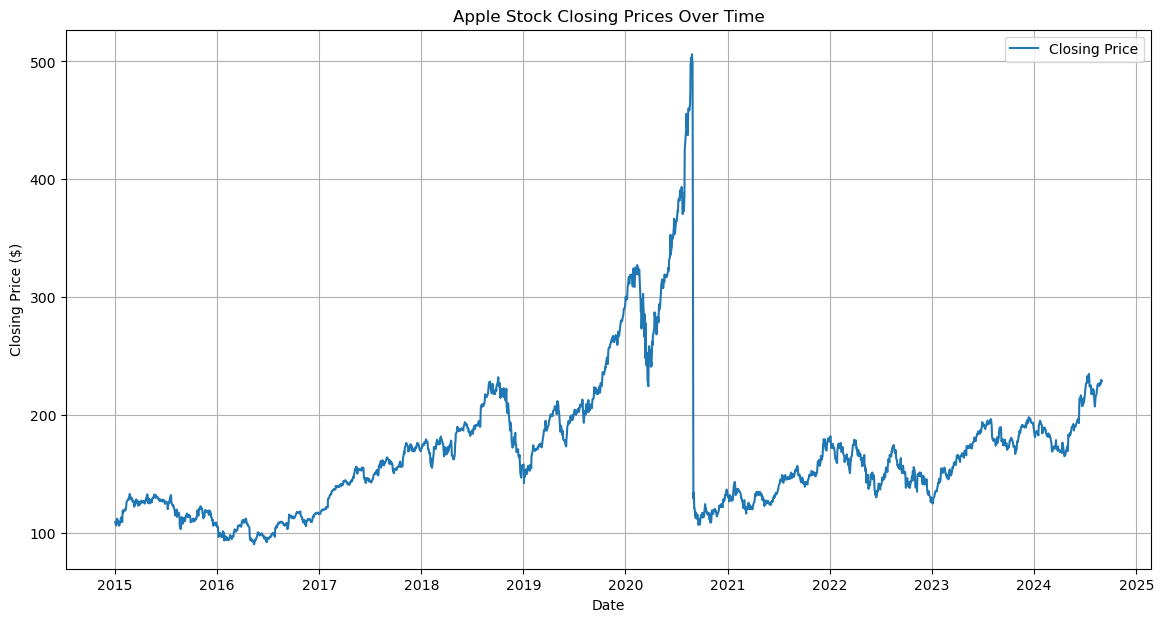

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Closing Price')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

### Decomposing the Time Series

In [13]:
decomposition = sm.tsa.seasonal_decompose(
    df['close'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

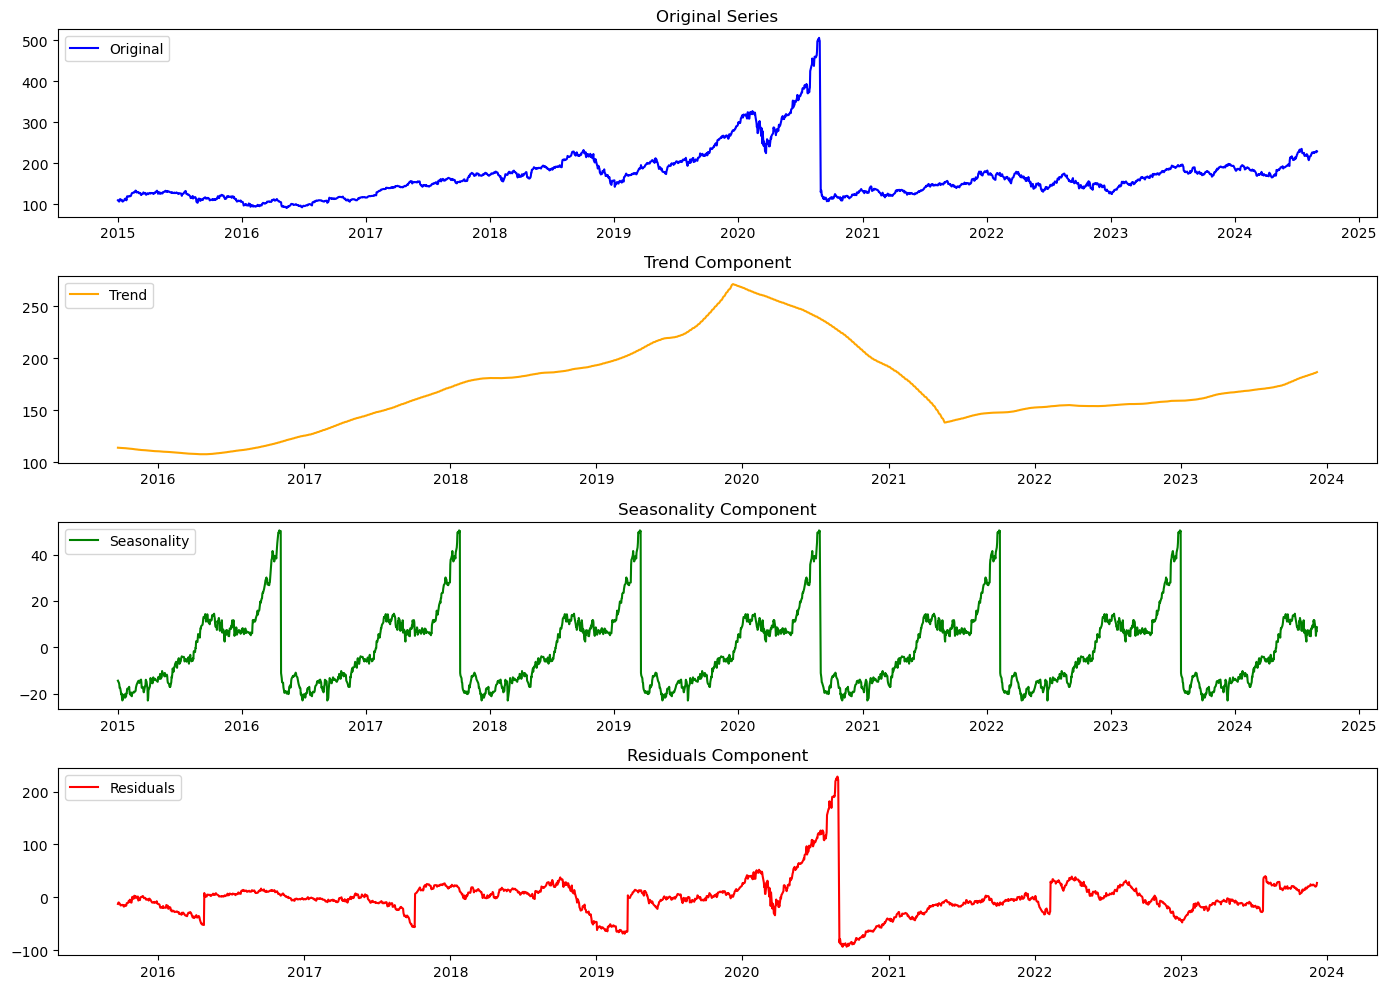

In [14]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df['close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residuals Component')

plt.tight_layout()
plt.show()

Observation--

original series:
Observation: There is a significant spike in the price around mid-2020, followed by a sharp drop. After the drop, the price stabilizes but fluctuates with a relatively lower range.
Insight: This initial spike could indicate a period of significant market activity or external factors affecting the stock, such as a stock split or market reactions to company news.


### Trend Component (Second Plot)
Description: The trend plot shows the long-term movement in the stock price, excluding short-term fluctuations.
Observation: The trend shows a declining pattern from the peak in mid-2020 until around mid-2021, followed by a gradual increase starting in early 2022.
Insight: The declining trend after the spike suggests a period of market correction or stabilization. The later upward trend indicates a recovery or steady growth in the stock price.

### Seasonality Component (Third Plot)
Description: The seasonality plot captures the repeating patterns or cycles in the stock price over time.
Observation: There are evident seasonal patterns in the stock prices, with noticeable fluctuations that appear to recur at regular intervals. The seasonality pattern changes abruptly around early 2021, corresponding with the drop in the original series.
Insight: The seasonality component shows that Apple’s stock prices have recurring patterns, likely tied to business cycles, product launches, or earnings reports. The disruption in the pattern around 2021 suggests a major event affecting the typical seasonal behavior.

#### Residuals Component (Bottom Plot)
Description: The residuals plot represents the noise or the irregular component left after removing the trend and seasonality.
Observation: The residuals show varying levels of volatility, with some abrupt changes around the same time as the spike and drop in the original series.
Insight: High residuals indicate the presence of irregular or unexpected fluctuations in the stock price that are not explained by the trend or seasonality. This may suggest events or information that had a sudden impact on stock prices, or it could indicate model mis-specification if the pattern is persistent.

### Stationary Check

In [15]:
closing_price = df['close']

In [16]:
adf_result = adfuller(closing_price.dropna())

In [17]:
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# Print the results
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

ADF Statistic: -2.995567280508582
p-value: 0.03531043924544694
Critical Values:
   1%: -3.4330662982661715
   5%: -2.8627400264482548
   10%: -2.5674088238838864


In [18]:
ts = df['close']

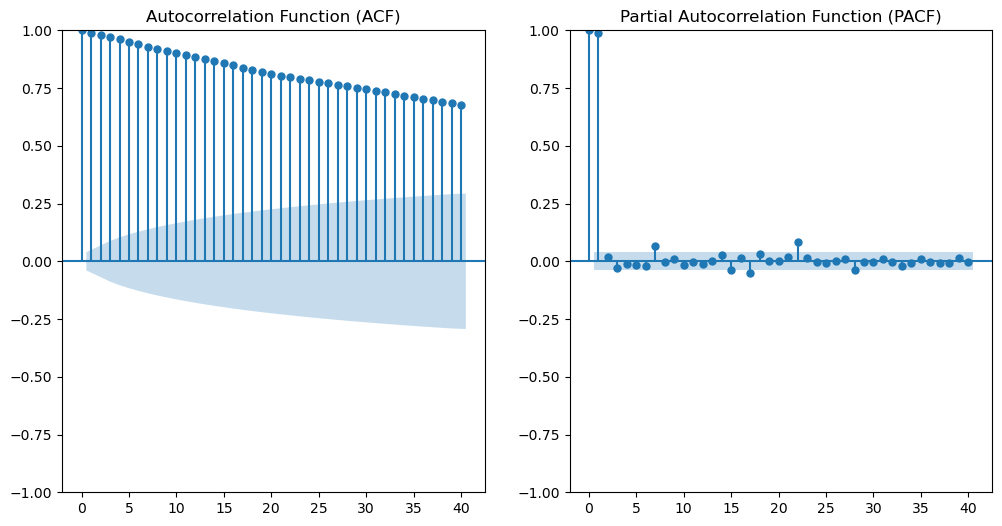

In [19]:
# Plot ACF and PACF to identify the ARIMA parameters (p, d, q)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(ts, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()